<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA__Quetes_Scraping_Scrape_multiple_pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraper Chuck Norris sur plusieurs pages

Continue ton entraînement en scrapant des Chuck Norris facts à partir de cette adresse : Chuck Norris facts ou de cette autre adresse Chuck Norris facts FR.

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [2]:
url_base = "http://www.chucknorrisfacts.fr/facts/top/"

---

1. __Observe attentivement l'URL de la page 1. Essaye de passer à la page 2. Dans un notebook python, essaye de générer automatiquement les URL des 5 premières pages (avec une boucle par exemple ?)__

In [3]:
for page in range(1, 6):
    url = url_base + str(page)
    print(url)

http://www.chucknorrisfacts.fr/facts/top/1
http://www.chucknorrisfacts.fr/facts/top/2
http://www.chucknorrisfacts.fr/facts/top/3
http://www.chucknorrisfacts.fr/facts/top/4
http://www.chucknorrisfacts.fr/facts/top/5


---

2. __Utilise BeautifulSoup pour scraper les facts et les notes des 5 premières pages, grâce aux URL que tu as générées. (Nous pourrions faire les 100 ou 200 pages suivantes, mais ca risque d'entrainer une charge inutile pour ceux qui administrent ce serveur.) Le résultat doit être dans un dictionnaire.__

In [17]:
def scrape_page(url_page: str) -> dict:
    navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
    html = requests.get(url_page, headers={'User-Agent': navigator})
    blagues = {}

    if html.status_code == 200:
        soup = BeautifulSoup(html.text, 'html.parser')
        blocs_blagues = soup.find_all('div', {'class': 'card'})
        print(len(blocs_blagues))

        for bloc in blocs_blagues:
            blague = bloc.find_all('p', {'class': 'card-text'})[0].string
            note = re.search(r'(\d\.\d+)\/', bloc.find_all('span')[0].string).group(1)
            note = float(note)
            blagues[blague] = note
    else:
        print(f"Connection error: {html.status_code}:{html.reason}")

    return blagues

In [18]:
blagues_with_note = {}

for page in range(1, 6):
    blagues = scrape_page(url_base + str(page))
    blagues_with_note.update(blagues)

20
20
20
20
20


---

3. __Crée un DataFrame contenant ces données, il doit donc posséder 2 colonnes et 99 lignes.__

In [11]:
df = pd.DataFrame.from_dict({'blague': blagues_with_note.keys(), 'note': blagues_with_note.values()})

In [15]:
df.head()

,blague,note
0,Les ennemis des amis de Chuck Norris sont ses ...,8.85
1,"Un jour Chuck Norris a eu un zero en latin, de...",8.43
2,L'avenir se demande parfois ce que Chuck Norri...,8.42
3,Chuck Norris ne sait pas à quoi ressemble Nico...,8.41
4,None,8.21


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   blague  91 non-null     object 
 1   note    92 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [13]:
df.shape

(92, 2)

---

4. __Crée une visualisation de la distribution des notes.__

<Axes: title={'center': 'Distribution des notes'}, xlabel='Note', ylabel='Frequency'>

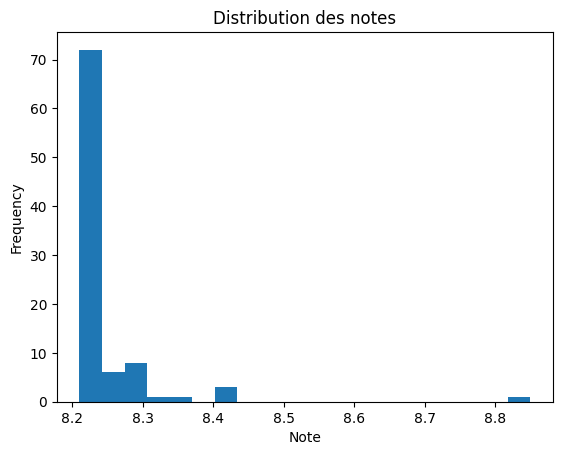

In [26]:
df.plot.hist(column='note', bins=20, title="Distribution des notes", legend=False, xlabel='Note')

---